In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn import datasets,linear_model,metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA

In [2]:
train=pd.read_csv('C:/Users/sudarson.SUDARSON/Downloads/Train (1).csv')
test=pd.read_csv('C:/Users/sudarson.SUDARSON/Downloads/Test (1).csv')
sample=pd.read_csv(r"C:\Users\sudarson.SUDARSON\Downloads\sample.csv")


In [3]:
trainx = train.iloc[0:,0:14]
trainy = train.iloc[0:,14]

In [4]:
train.shape

(14576, 15)

In [5]:
test.shape

(2143, 14)

In [6]:
train.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [7]:
test.isnull().sum()

Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
dtype: int64

In [8]:
game=trainx.append(test,sort=False,ignore_index=True)

In [9]:
game.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [10]:
game.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'],
      dtype=object)

In [11]:
#game[game.User_Score=="tbd"]=

In [12]:
game.Year_of_Release.fillna(game.Year_of_Release.median(),inplace=True)
game.Critic_Score.fillna(game.Critic_Score.median(),inplace=True)
game.Critic_Count.fillna(game.Critic_Count.median(),inplace=True)
game.User_Score.fillna(game.User_Score.mode().max(),inplace=True)
game.User_Count.fillna(game.User_Count.median(),inplace=True)
game.Rating.fillna(game.Rating.mode().max(),inplace=True)
game.Developer.fillna(game.Developer.mode().max(),inplace=True)

In [13]:
game=game.dropna()

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


'plt.boxplot(game.Critic_Score)\nplt.subplot(1,6,3)\nplt.boxplot(game.Critic_Count)\nplt.subplot(1,6,4)\nplt.boxplot(game.User_Score)\nplt.subplot(1,6,5)\nplt.boxplot(game.User_Count)\nplt.subplot(1,6,6)\nplt.boxplot(game.Rating)'

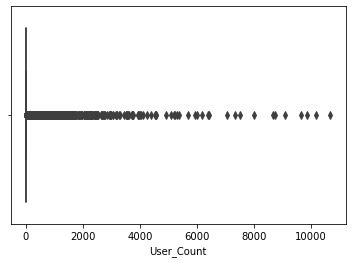

In [14]:
#plt.figure(figsize=[12,6])
#plt.subplot(1,6,1)
sns.boxplot(game.User_Count)
#plt.subplot(1,6,2)
'''plt.boxplot(game.Critic_Score)
plt.subplot(1,6,3)
plt.boxplot(game.Critic_Count)
plt.subplot(1,6,4)
plt.boxplot(game.User_Score)
plt.subplot(1,6,5)
plt.boxplot(game.User_Count)
plt.subplot(1,6,6)
plt.boxplot(game.Rating)'''

{'whiskers': [<matplotlib.lines.Line2D at 0x1f909555f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9095646a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f909555bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f909564dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f909571190>],
 'means': []}

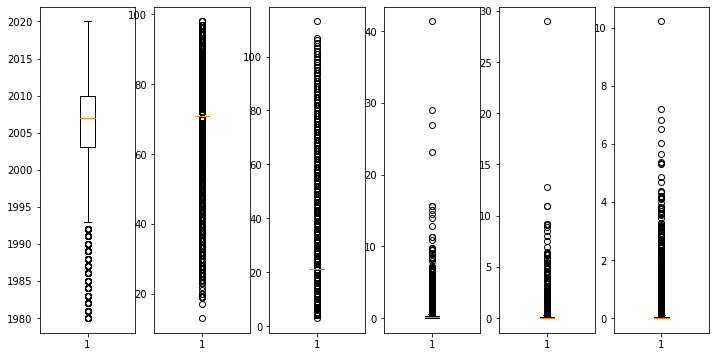

In [15]:
plt.figure(figsize=[12,6])
plt.subplot(1,6,1)
plt.boxplot(game.Year_of_Release)
plt.subplot(1,6,2)
plt.boxplot(game.Critic_Score)
plt.subplot(1,6,3)
plt.boxplot(game.Critic_Count)
plt.subplot(1,6,4)
plt.boxplot(game.NA_Sales)
plt.subplot(1,6,5)
plt.boxplot(game.EU_Sales)
plt.subplot(1,6,6)
plt.boxplot(game.JP_Sales)

In [16]:
q3 = game.NA_Sales.quantile(0.75)
q1 = game.NA_Sales.quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
game.NA_Sales[game.NA_Sales > UE] = UE

In [17]:
q3 = game.EU_Sales.quantile(0.75)
q1 = game.EU_Sales.quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
game.EU_Sales[game.EU_Sales > UE] = UE

In [18]:
q3 = game.JP_Sales.quantile(0.75)
q1 = game.JP_Sales.quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
game.JP_Sales[game.JP_Sales > UE] = UE

In [19]:
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,0.6,0.275,0.1,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0.6,0.275,0.1,71.0,21.0,tbd,24.0,Ubisoft,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.6,0.275,0.1,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.6,0.275,0.1,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.6,0.275,0.1,71.0,21.0,tbd,24.0,Ubisoft,E


In [20]:
dummy = pd.get_dummies(game)
scaler=mms().fit(dummy)
TS = scaler.transform(dummy)
df1= pd.DataFrame(TS)
dummy

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,0.60,0.275,0.1,76.0,51.0,322.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1985.0,0.60,0.275,0.1,71.0,21.0,24.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2008.0,0.60,0.275,0.1,82.0,73.0,709.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2009.0,0.60,0.275,0.1,80.0,73.0,192.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1996.0,0.60,0.275,0.1,71.0,21.0,24.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2008.0,0.05,0.000,0.0,61.0,6.0,8.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16715,2008.0,0.00,0.050,0.0,71.0,41.0,203.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16716,2010.0,0.06,0.000,0.0,71.0,21.0,24.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16717,2014.0,0.00,0.050,0.0,58.0,5.0,4.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
train = df1.iloc[0:14576,0:]
test = df1.iloc[14576:,0:]
trainx,testx,trainy,testy = train_test_split(train,trainy,test_size = 0.2)

In [22]:
df1.shape

(16663, 13943)

In [ ]:
reg = LinearRegression().fit(trainx,trainy)

In [ ]:
reg.predict(testx)

In [ ]:
rms1=sqrt(mean_squared_error(testy,reg.predict(testx),squared=False))
rms1

In [ ]:
reg1 = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)

In [ ]:
reg1.predict(testx)

In [ ]:
rms2=sqrt(mean_squared_error(testy,reg1.predict(testx),squared=False))
rms2

In [ ]:
reg3 = RandomForestRegressor(max_depth=2, random_state=0).fit(trainx,trainy)

In [ ]:
reg3.predict(testx)

In [ ]:
rms3=sqrt(mean_squared_error(testy,reg3.predict(testx),squared=False))
rms3

In [ ]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)

In [ ]:
regr.predict(testx)

In [ ]:
rms4=sqrt(mean_squared_error(testy,regr.predict(testx),squared=False))
rms4

In [ ]:
clf = GradientBoostingRegressor(random_state=0).fit(trainx,trainy)

In [ ]:
clf.predict(testx)

In [ ]:
rms5=sqrt(mean_squared_error(testy,clf.predict(testx),squared=False))
rms5

In [ ]:
print("LinearRegression          = ",reg.score(testx,testy))
print("Decision Tree Regressor   = ",reg1.score(testx,testy))
print("RandomForestRegressor     = ",reg3.score(testx,testy))
print("AdaBoostRegressor         = ",regr.score(testx,testy))
print("GradientBoostingRegressor = ",clf.score(testx,testy))

In [ ]:
rms = [
    ["LinearRegression           rms",rms1],
    ["decision_tree_regressor    rms",rms2],
    ["random_forest_regression   rms",rms3],
    ["ada_boosting_regression    rms" ,rms4],
    ["gradient_boosting_regressionrms  ",rms5]
    ]

In [ ]:
rms

In [ ]:
def regression(x,y):
    trainx,testx,trainy,test=train_test_split(x,y,test_size=0.2)
    linearreg= LinearRegression().fit(trainx,trainy)
    linearreg.predict(testx)
    linearrms=sqrt(mean_squared_error(testy,linearreg.predict(testx),squared=False))
    decisionreg = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
    decisionreg.predict(testx)
    decisionrms=sqrt(mean_squared_error(testy,decisionreg.predict(testx),squared=False))
    randomreg= RandomForestRegressor(max_depth=10, random_state=0).fit(trainx,trainy)
    randomreg.predict(testx)
    randomrms=sqrt(mean_squared_error(testy,randomreg.predict(testx),squared=False))
    adabreg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)
    adabreg.predict(testx)
    adabrms=sqrt(mean_squared_error(testy,adabreg.predict(testx),squared=False))
    gradreg= GradientBoostingRegressor(random_state=0).fit(trainx,trainy)
    gradreg.predict(testx)
    gradrms=sqrt(mean_squared_error(testy,gradreg.predict(testx),squared=False))
    print("LinearRegression          = ",linearreg.score(testx,testy))
    print("Decision Tree Regressor   = ",decisionreg.score(testx,testy))
    print("RandomForestRegressor     = ",randomreg.score(testx,testy))
    print("AdaBoostRegressor         = ",adabreg.score(testx,testy))
    print("GradientBoostingRegressor = ",gradreg.score(testx,testy))
    
    print("LinearRegression          rms   = ",linearrms)
    print("Decision Tree Regressor   rms   = ",decisionrms)
    print("RandomForestRegressor     rms   = ",randomrms)
    print("AdaBoostRegressor         rms   = ",adabrms)
    print("GradientBoostingRegressor rms   = ",gradrms)



In [ ]:
regression(trainx,trainy)

In [ ]:
#game=train.to_csv("Downloads\game.csv")

In [ ]:
test=pd.read_csv('C:/Users/sudarson.SUDARSON/Downloads/Test (1).csv')

In [ ]:
test

In [ ]:
name=test.Name
name

In [ ]:

globalsales=pd.DataFrame(clf.predict(testx))
globalsales

In [ ]:
globalsales.columns=["global sales"]
globalsales=globalsales.iloc[0:2143,0:]

In [ ]:
dfe = pd.concat([name,globalsales],axis =1 )

In [ ]:
dfe.columns=["name","global sales"]

In [ ]:
dfe

In [ ]:
#game=dfe.to_csv("Downloads/game.csv",index=False)

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()